In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

In [16]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [17]:
# Normalize the data (scale pixel values between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

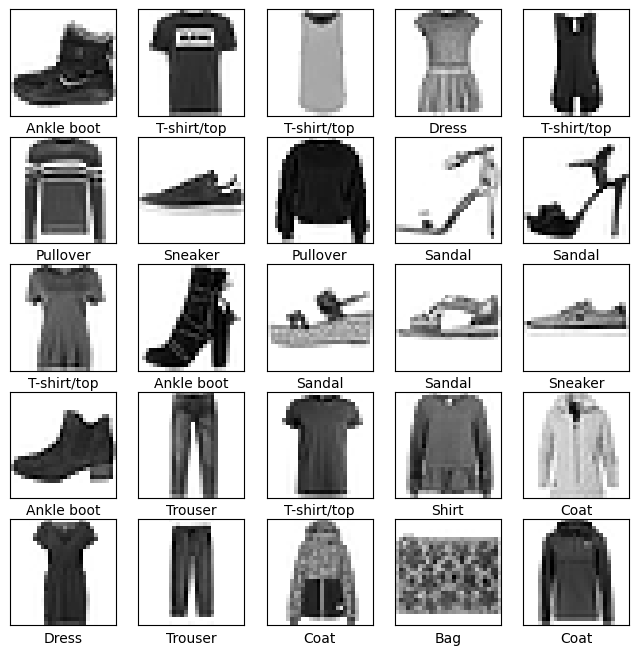

In [26]:
# Visualize some training images
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [20]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [25]:
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/30
844/844 - 50s - 59ms/step - accuracy: 0.7920 - loss: 0.5634 - val_accuracy: 0.8565 - val_loss: 0.3936
Epoch 2/30
844/844 - 50s - 60ms/step - accuracy: 0.8366 - loss: 0.4509 - val_accuracy: 0.8722 - val_loss: 0.3399
Epoch 3/30
844/844 - 50s - 59ms/step - accuracy: 0.8548 - loss: 0.4021 - val_accuracy: 0.8817 - val_loss: 0.3207
Epoch 4/30
844/844 - 50s - 59ms/step - accuracy: 0.8651 - loss: 0.3731 - val_accuracy: 0.8895 - val_loss: 0.2913
Epoch 5/30
844/844 - 51s - 60ms/step - accuracy: 0.8736 - loss: 0.3506 - val_accuracy: 0.8970 - val_loss: 0.2776
Epoch 6/30
844/844 - 79s - 94ms/step - accuracy: 0.8770 - loss: 0.3350 - val_accuracy: 0.8985 - val_loss: 0.2703
Epoch 7/30
844/844 - 50s - 60ms/step - accuracy: 0.8809 - loss: 0.3238 - val_accuracy: 0.9033 - val_loss: 0.2622
Epoch 8/30
844/844 - 50s - 60ms/step - accuracy: 0.8873 - loss: 0.3127 - val_accuracy: 0.9027 - val_loss: 0.2582
Epoch 9/30
844/844 - 49s - 58ms/step - accuracy: 0.8894 - loss: 0.3007 - val_accuracy: 0.9033 - 

In [27]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test accuracy: {test_acc*100:.2f}%")


313/313 - 3s - 8ms/step - accuracy: 0.9155 - loss: 0.2366

✅ Test accuracy: 91.55%


In [28]:
# Make predictions
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [29]:
# Visualize predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'green' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})",
               color=color)

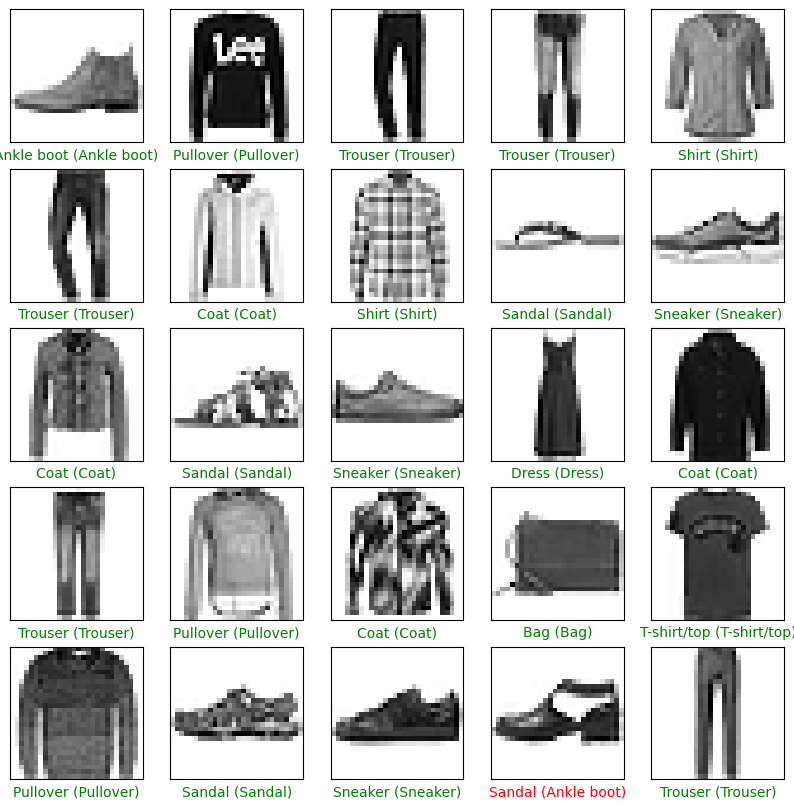

In [34]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plot_image(i, predictions[i], y_test, x_test)
plt.show()


In [31]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

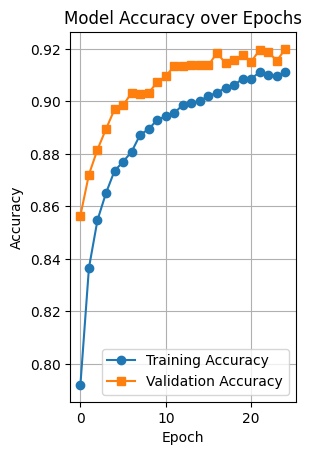

In [32]:
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

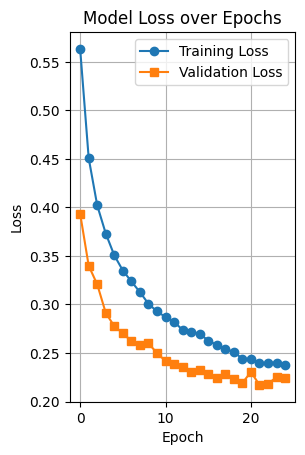

In [33]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()